# Feature Importance (Figure 4)

This script shows the feature importance for different emulators

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

chi_abd
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
original feature names:
 ['DMS_SRF', 'H2O2_SRF', 'H2SO4_SRF', 'O3_SRF', 'SO2_SRF', 'SOAG_SRF', 'Mass_so4', 'Mass_bc', 'Mass_ncl', 'Mass_dst', 'Mass_pom', 'Mass_soa', 'T', 'RELHUM', 'SZA']
feature names for visualization:
 ['DMS', 'H2O2', 'H2SO4', 'O3', 'SO2', 'SOAG', 'so4', 'bc', 'ncl', 'dst', 'pom', 'soa', 'T', 'RELHUM', 'SZA']


chi_opt1
XGBRegressor(base_score=0.5, booster='gb

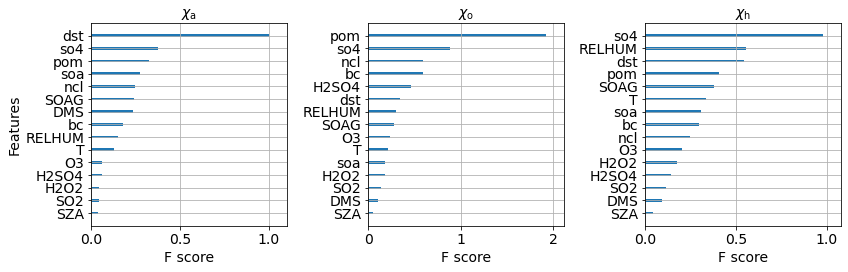

In [2]:
rc={'axes.labelsize': 14,
'font.size': 14, 'legend.fontsize': 14, 
'axes.titlesize': 14,
'xtick.labelsize': 14.0,
'ytick.labelsize': 14.0}
plt.rcParams.update(**rc)

chi_ls = ['chi_abd','chi_opt1','chi_hyg']
feature_name = ['DMS','H2O2','H2SO4','O3','SO2','SOAG',
                'so4', 'bc', 'ncl','dst','pom','soa',
                'T','RELHUM','SZA']
title_dict={
    "chi_abd":r'$\chi_{\rm a}$',
    "chi_opt1":r'$\chi_{\rm o}$',
    "chi_hyg":r'$\chi_{\rm h}$'
}

fig = plt.figure(figsize = (12,4))
i = 1
for chi in chi_ls:
    print(chi)
    XGBreg_load=pickle.load(open("./xgb_model/"+chi+".dat","rb"))
    print(XGBreg_load)
    XGBreg_load = XGBreg_load.get_booster()
    print("original feature names:\n",XGBreg_load.feature_names)
    XGBreg_load.feature_names = feature_name
    print("feature names for visualization:\n",XGBreg_load.feature_names)
    
    ax = plt.subplot(1,3,i)
    xgb.plot_importance(ax=ax,booster=XGBreg_load,
                        importance_type="gain",
                        title=title_dict[chi],
                        show_values=False)
    if i!=1:
        ax.set_ylabel("")
    print("\n")
    i=i+1
    
plt.tight_layout()
plt.savefig("../figures/feature_importance_gain.pdf")
plt.show()